
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Jokin Cuesta Arrillaga</p>
</div>



# PREPARACIÓN DE DATOS

Autor: Jokin Cuesta Arrillaga.


A lo largo de esta práctica veremos como aplicar diferentes técnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de un conjunto de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>Reducción de la dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>

--- 

Para eso necesitaremos las siguientes librerías:
- **numpy:** ofrece funciones matemáticas integrales, generadores de números aleatorios, rutinas de álgebra lineal, transformadas de Fourier y más.
- **pandas:** es una herramienta de manipulación y análisis de datos de código abierto rápida, potente, flexible y fácil de usar.
- **sklearn:** Herramientas simples y eficientes para el análisis predictivo de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# 1. Carga del conjunto de datos

En primer lugar, se carga el conjunto de datos "Boston house prices", el cual contiene el valor de las casas en diferentes zonas de Boston dependiendo de múltiples factores. Se puede descargar de internet [aquí](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) o se puede cargar directamente desde la librería "scikit-learn", que incorpora un conjunto de datasets muy conocidos y usados para la minería de datos y machine learning [https://scikit-learn.org/stable/datasets.html](https://scikit-learn.org/stable/datasets.html).

Para estos ejercicios, utilizaremos como variable respuesta a "MEDV": la mediana del valor de las casas en una zona de Boston (en k$ -miles de dólares-).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Cargaremos el conjunto de datos "boston house-prices dataset" y mostraremos:
<ul>
  <li>El número y nombre de los atributos (variables que podrían ser usadas para predecir la respuesta "MEDV")</li>
  <li>El número de filas del conjunto de datos</li>
  <li>Verificamos si hay o no "missing values" y en qué columnas</li>
</ul>

<hr>
Usando sklearn (sklearn.datasets.load_boston), exploramos las diferents 'keys' del objecto obtenido.<br>
Para ser más fácil de manipular los datos, nos resulta útil pasar los datos (atributos + respuesta) a un dataframe de pandas.
<hr>
Nota: Al cargar el conjunto de datos desde la librería "scikit-learn" se observa que el conjunto de datos no va a ser mantenido en el futuro debido a un problema ético en los datos, el cual no interfiere con el objetivo de la presente práctica (recolección y análisis de datos). 
</div>

In [2]:
#Carga de datos de boston house prices
boston = datasets.load_boston()
df_boston = pd.DataFrame(data = boston.data, index = None, columns = boston.feature_names)
df_boston["MEDV"] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#El número y nombre de los atributos
num_col = len(df_boston.columns)
print(num_col,df_boston.columns)

#Número de filas
num_fil = len(df_boston)
print(num_fil)

#Verificación si hay o no "missing values" y en qué columnas
df_boston.isna().any() 

14 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
506


CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

Se ve que tenemos 14 atributos (incluído MEDV), por lo que podemos utilizar las 13 restantes para tratar de predecir el valor de MEDV. Por otro lado, tenemos 506 filas y no contiene ningún *missing value*.

Las variables son estas, según la información obtenida de sus características:

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per 10000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

# 2. Análisis de los datos

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realizaremos un análisis estadístico básico: 
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calculamos la frecuencia</li>
      <li>Hacemos un gráfico de barras</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calculamos estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
      <li>Hacemos un histograma de las variables INDUS, AGE y MEDV</li>
    </ul>
</ul>
    
<hr>
Utilizaremos la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>

FRECUENCIA CHAS 
 0.0    471
1.0     35
Name: CHAS, dtype: int64


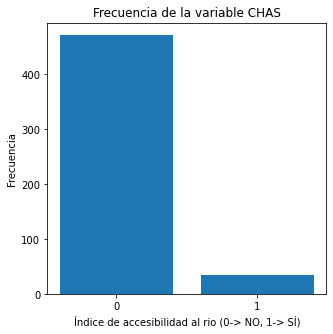

In [4]:
# frecuencia para CHAS
x_values1 = df_boston["CHAS"].unique()
y_values1 = df_boston["CHAS"].value_counts().tolist()
print("FRECUENCIA CHAS \n", df_boston["CHAS"].value_counts())

# Dibujamos el barplot con la frecuencia
plt.figure(figsize = (5,5))
plt.bar(x_values1, y_values1)

#Añadimos título y etiquetas
plt.title('Frecuencia de la variable CHAS')
plt.xticks(x_values1)
plt.xlabel('Índice de accesibilidad al rio (0-> NO, 1-> SÍ)')
plt.ylabel('Frecuencia')

#Mostramos
plt.show()

In [5]:
for _ in df_boston:
    if _ != "CHAS":
        print("CÁLCULOS ESTADÍSTICOS BÁSICOS DE "+_+"\n",df_boston[_].describe(), "\n")

CÁLCULOS ESTADÍSTICOS BÁSICOS DE CRIM
 count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64 

CÁLCULOS ESTADÍSTICOS BÁSICOS DE ZN
 count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64 

CÁLCULOS ESTADÍSTICOS BÁSICOS DE INDUS
 count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64 

CÁLCULOS ESTADÍSTICOS BÁSICOS DE NOX
 count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64 

CÁLCULOS ESTADÍSTICOS BÁSICOS DE RM
 count    506.000000
mean       6.284634
std        0.70

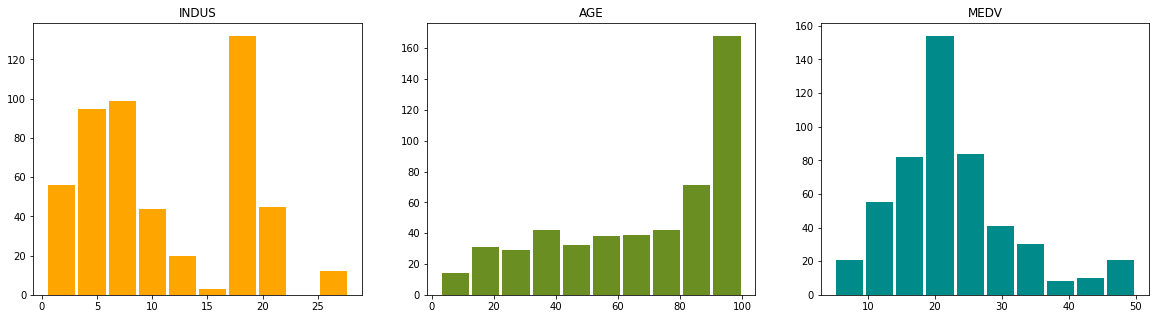

In [6]:
#Histogramas de INDUS, AGE y MEDV
fig, axis = plt.subplots(1, 3, figsize=(20, 5))

#INDUS
axis[0].hist(df_boston['INDUS'], align = 'mid', rwidth = 0.9, color='orange')
axis[0].set_title('INDUS')
axis[0].set_label('INDUS')
label = ['INDUS']

#AGE
axis[1].hist(df_boston['AGE'], align = 'mid', rwidth = 0.9, color = 'olivedrab')
axis[1].set_title('AGE')
plt.draw()

#MEDV
axis[2].hist(df_boston['MEDV'], align = 'mid', rwidth = 0.9, color = "darkcyan")
axis[2].set_title('MEDV')
plt.show()

## 2.2 Análisis exploratorio de los datos

En este ejercicio exploraremos la relación de los atributos con la variable respuesta, mediante gráficos y analizando las correlaciones de los atributos numéricos.

In [7]:
response = "MEDV"
cat_feat = "CHAS"
num_feats = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
print('Respuesta ("target"):', response)
print("Atributo categórico:", cat_feat)
print("Atributos numéricos:", num_feats)

Respuesta ("target"): MEDV
Atributo categórico: CHAS
Atributos numéricos: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realizaremos un gráfico del histograma de valores de la variable respuesta, separado por los posibles valores (clases) del atributo categórico. Para comparar mejor los valores de MEDV para las diferentes clases de CHAS, los histogramas del gráfico tienen que estar sobrepuestos. Añadiremos una leyenda para saber a qué clase corresponde cada histograma.
    
La finalidad es observar como se distribuye el valor de la respuesta MEDV en función del valor de la clase CHAS, para poder identificar de manera visual y rápida si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: usaremos la función "hist" de la librería "matplotlib", así como su parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Para comparar mejor los histogramas, consideraremos representar la densidad de probabilidad en vez del número de entradas por bin. De este modo, la escala de los histogramas será la misma para cada clase y será fácil de comparar. Usaremos el parámetro "density" de la misma función "hist".  
</div>

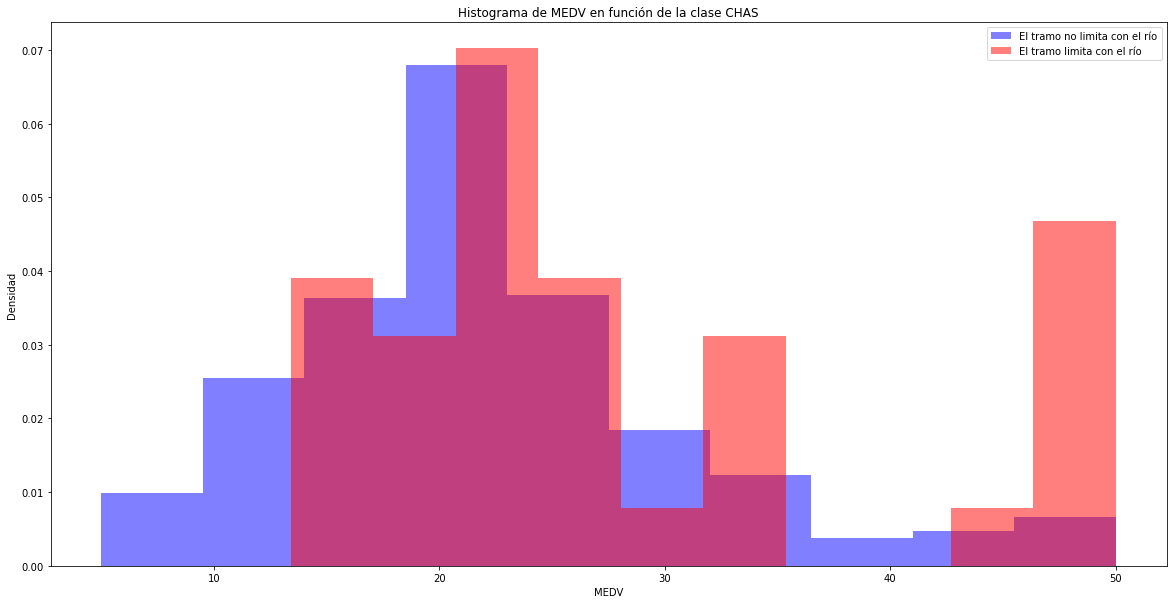

In [8]:
#Separamos las instances según la variable categórica
medv_zero = df_boston[df_boston["CHAS"] == 0]["MEDV"]
medv_one = df_boston[df_boston["CHAS"] == 1]["MEDV"]

#Dibujamos ambos histogramas:
plt.figure(figsize=(20,10))

#Añadimos el parámetro alpha para la sobreposición de ambas
plt.hist(medv_zero, density = True, alpha=0.5, label = "Zero",color='blue')
plt.hist(medv_one, density = True, alpha=0.5, label = "One",color='red')

#Las etiquetas
labels = ["El tramo no limita con el río","El tramo limita con el río"]
plt.legend(labels)
plt.xlabel('MEDV')
plt.ylabel('Densidad')

#El título
plt.title("Histograma de MEDV en función de la clase CHAS")
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> El atributo CHAS sí tendrá un peso a la hora de predecir la MEDV ya que los tramos que limitan con el río tienen un precio superior a las otras, como se aprecia en el último bin de MEDV, donde existe una gran densidad de casas con acceso al río.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repetiremos los histogramas anteriores, añadiendo una línea vertical indicando la media de cada uno de los histogramas. Pintaremos las líneas del mismo color que el histograma para que quede claro a cual hacen referencia. Añadiremos a la leyenda la clase de CHAS y los valores de la media y la desviación estandard en cuestión. La finalidad es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
    
<hr>
Usaremos "axvline", de matplotlib axis, para las líneas verticales.
</div>

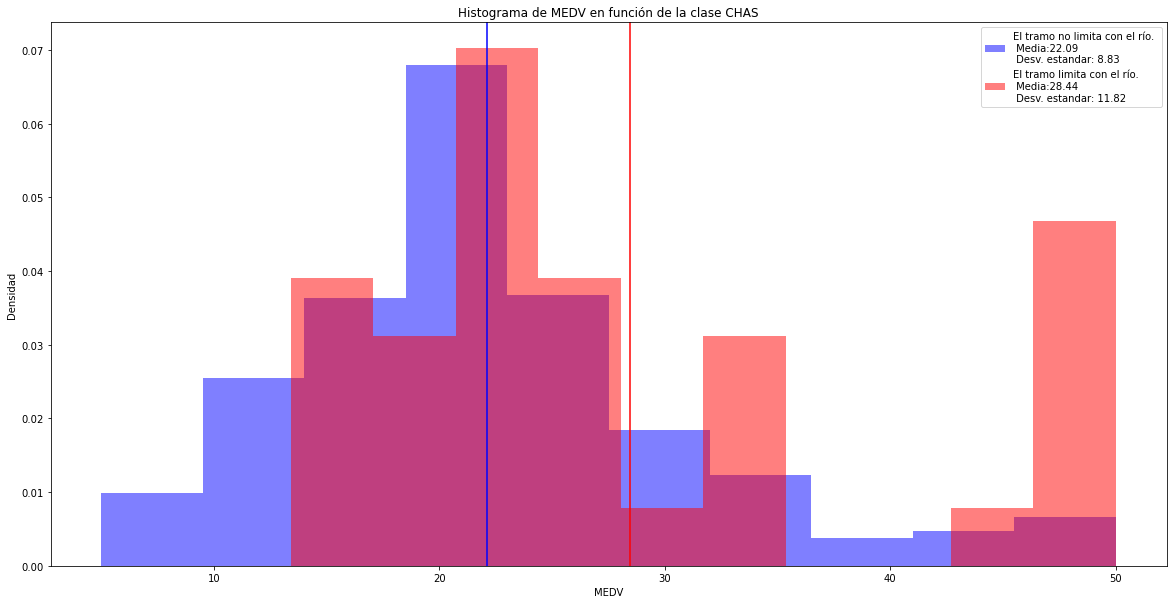

In [9]:
#Repetimos el histograma
plt.figure(figsize=(20,10))
plt.hist(medv_zero, density = True, alpha=0.5, label = "Zero",color='blue')
plt.hist(medv_one, density = True, alpha=0.5, label = "One",color='red')

#Añadimos etiquetas (+ media y ds)
labels = ["El tramo no limita con el río. \n Media:"
          + str(round(medv_zero.mean(),2))+
          " \n Desv. estandar: "
          + str(round(medv_zero.std(),2)),
          "El tramo limita con el río.  \n Media:" 
          + str(round(medv_one.mean(),2))+
          " \n Desv. estandar: "+str(round(medv_one.std(),2))]

#título y etiquetas
plt.title("Histograma de MEDV en función de la clase CHAS")
plt.legend(labels)
plt.xlabel('MEDV')
plt.ylabel('Densidad')

#Línea vertical en la media
plt.axvline(medv_zero.mean(),color='blue')
plt.axvline(medv_one.mean(),color='red')
plt.show()

## Correlaciones de los atributos numéricos

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Ahora calcularemos y mostraremos la correlación entre todos los atributos numéricos y la respuesta. Incluiremos las variables y las correlaciones con MEDV en un diccionario para poder dibujar después las correlaciones en un barplot.
</div>

La correlación entre CRIM y la respuesta es:  -0.3883046085868116
La correlación entre ZN y la respuesta es:  0.36044534245054327
La correlación entre INDUS y la respuesta es:  -0.4837251600283729
La correlación entre NOX y la respuesta es:  -0.4273207723732826
La correlación entre RM y la respuesta es:  0.6953599470715393
La correlación entre AGE y la respuesta es:  -0.37695456500459623
La correlación entre DIS y la respuesta es:  0.24992873408590396
La correlación entre RAD y la respuesta es:  -0.3816262306397781
La correlación entre TAX y la respuesta es:  -0.4685359335677671
La correlación entre PTRATIO y la respuesta es:  -0.507786685537562
La correlación entre B y la respuesta es:  0.3334608196570665
La correlación entre LSTAT y la respuesta es:  -0.7376627261740148


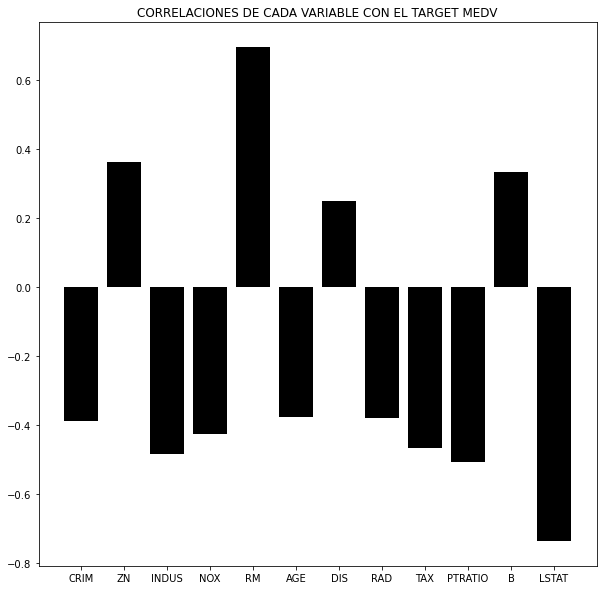

In [10]:
from scipy import stats

corr = {}
for _ in num_feats:
    r, p = stats.pearsonr(df_boston[_], df_boston['MEDV'])
    print("La correlación entre " + str(_) + " y la respuesta es: ", r)
    corr[_] = r

#Dibujamos en un barplot para hacerlo visual
plt.figure(figsize=(10,10))

names = list(corr.keys())
values = list(corr.values())
plt.bar(range(len(corr)), values, tick_label = names, color = 'black')
plt.title('CORRELACIONES DE CADA VARIABLE CON EL TARGET MEDV')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representaremos gráficamente las relaciones entre todas las parejas de las variables numéricas (sin incluir la respuesta) del conjunto de datos. La finalidad de este ejercicio es poder observar y analizar las correlaciones de manera gráfica entre las variables.

<hr>Usaremos la función "pairplot" de la librería 'seaborn'.
</div>

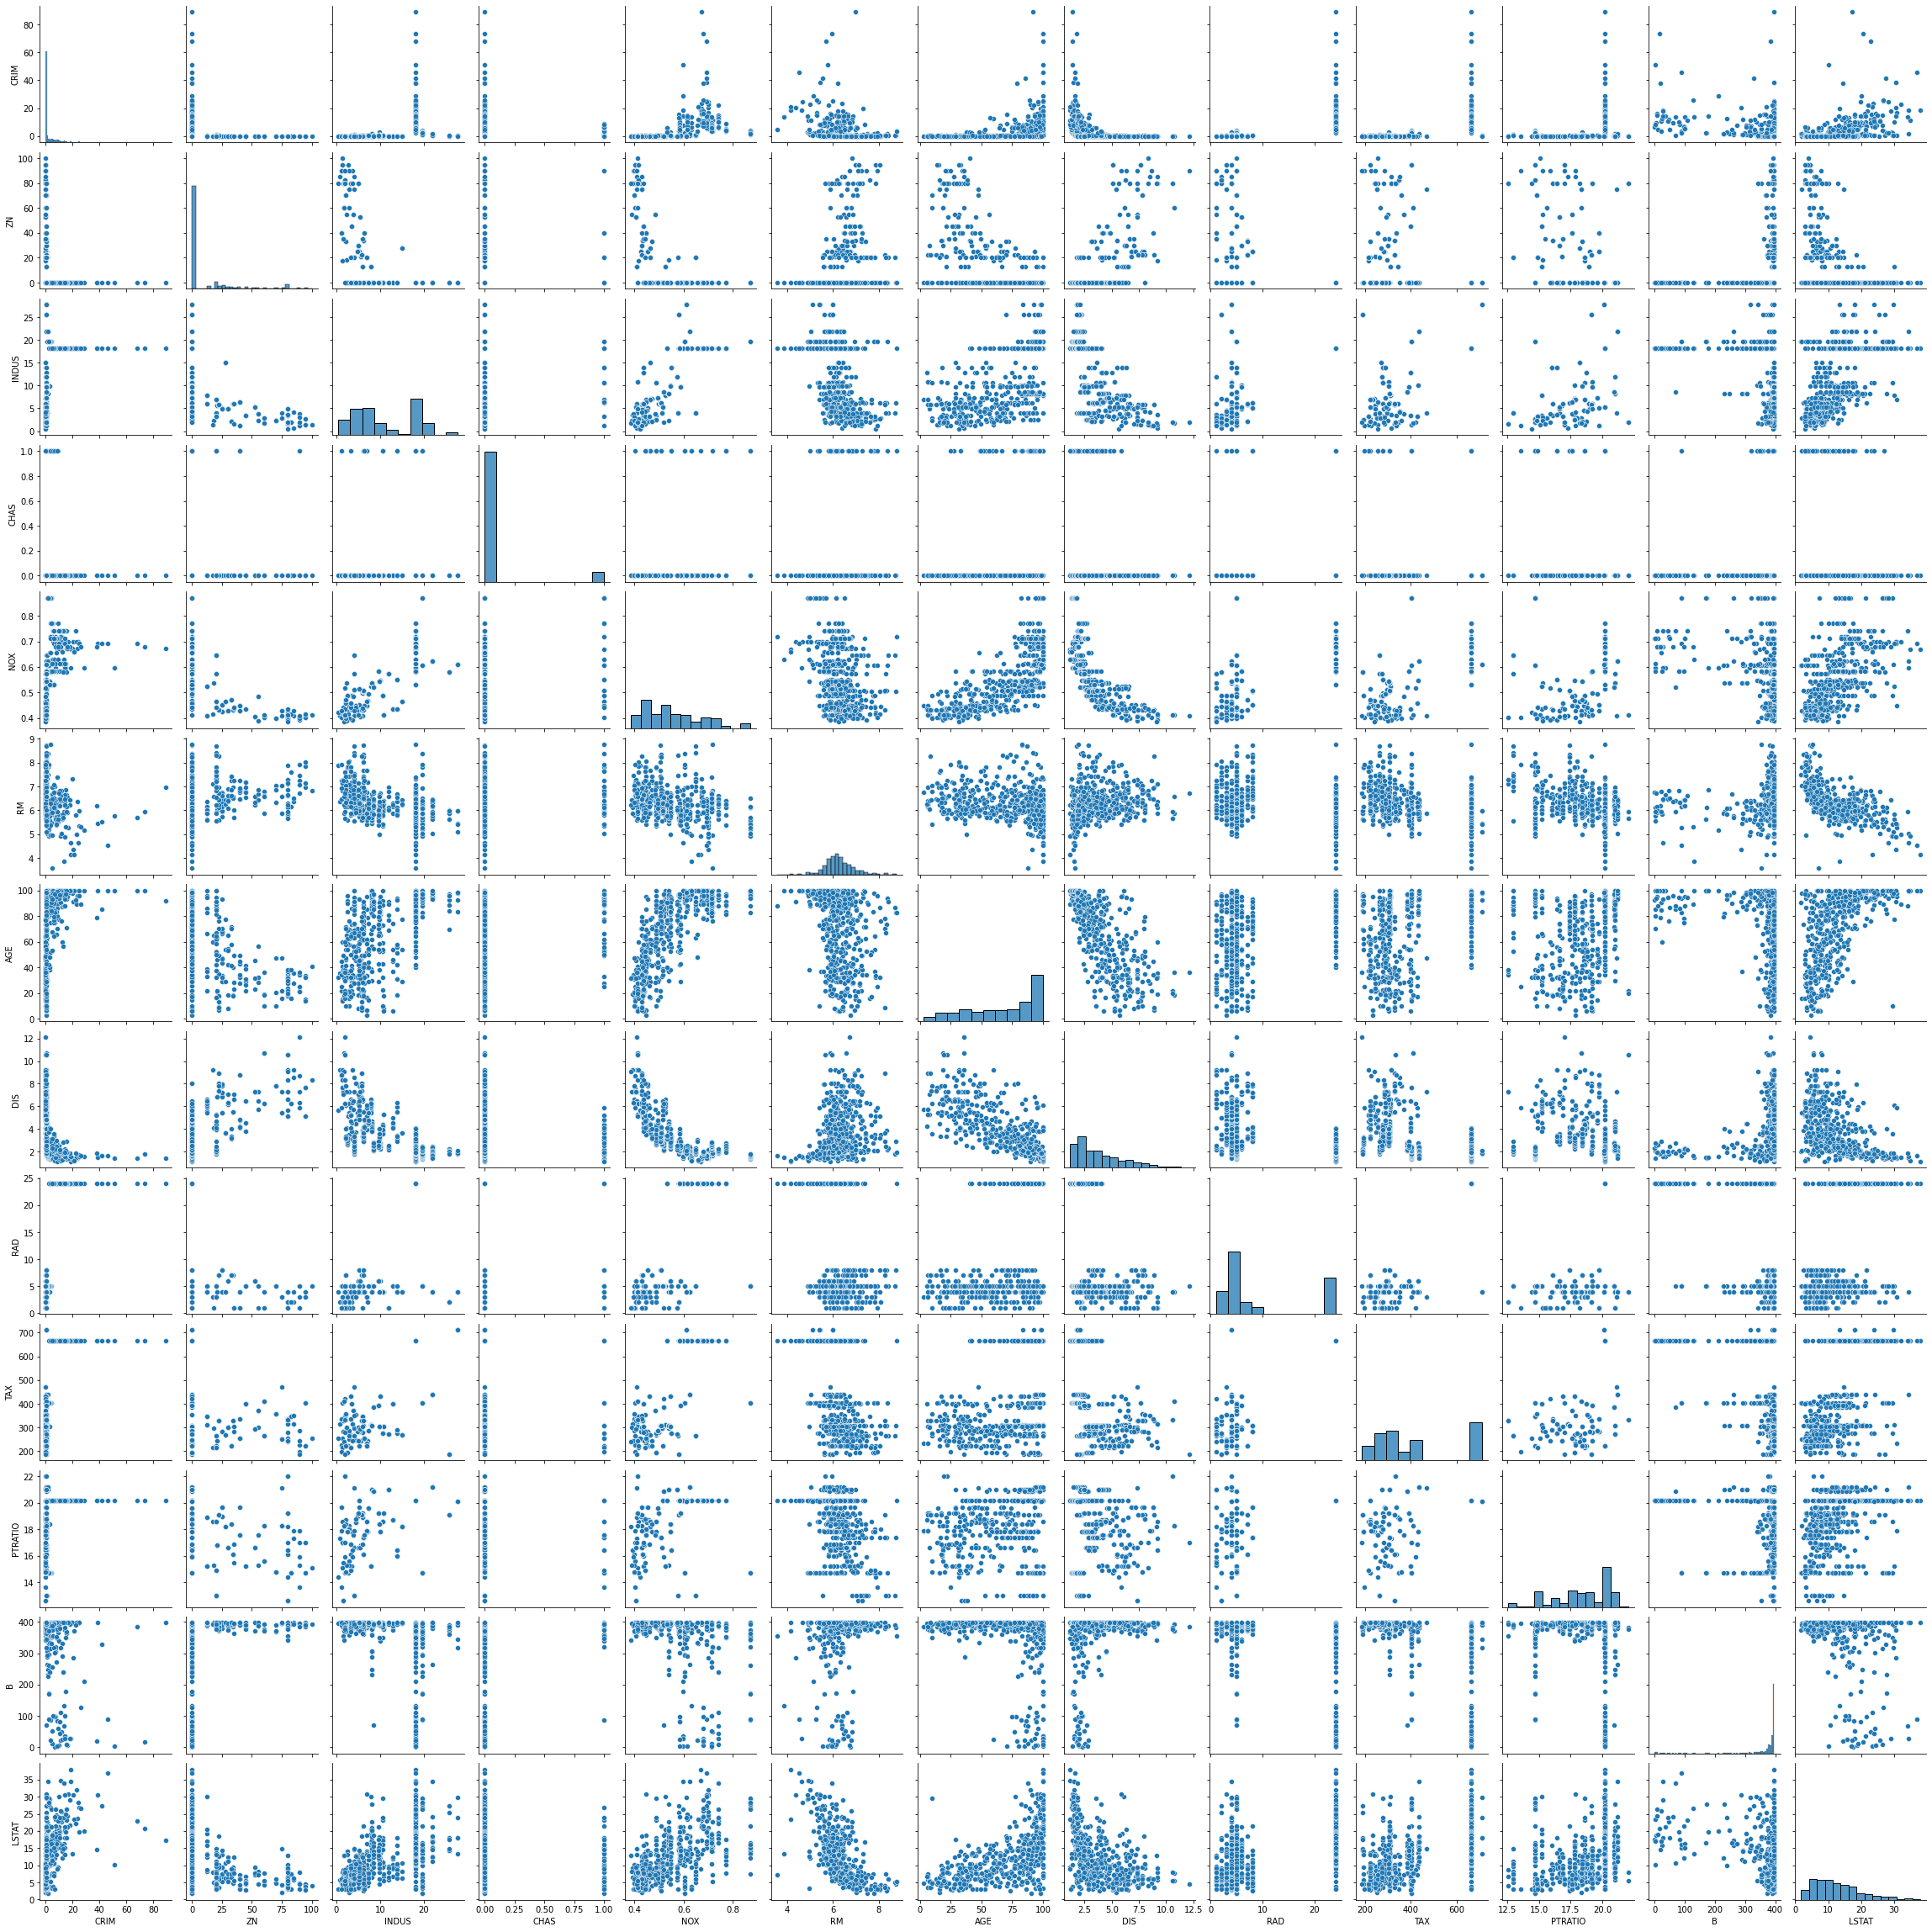

In [11]:
#Utilizamos todas las parejas de variables quitando MEDV
sns.pairplot(df_boston.drop(columns=['MEDV']))

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identificando los 2 atributos que tienen una correlación más fuerte con la respuesta  y los 2 con una correlación más débil (coeficiente de correlación mayor o menor en valor absoluto). Buscaremos estos máximos y mínimos por código para así poder reutilizarlo para otros diccionarios de correlaciones.
    
Para observar y analizar las correlaciones gráficamente, representaremos, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, en cada gráfico añadiremos la representación de una regresión lineal que fite los puntos.
        
<hr>Usaremos la función "regplot" de la librería 'seaborn'.
</div>

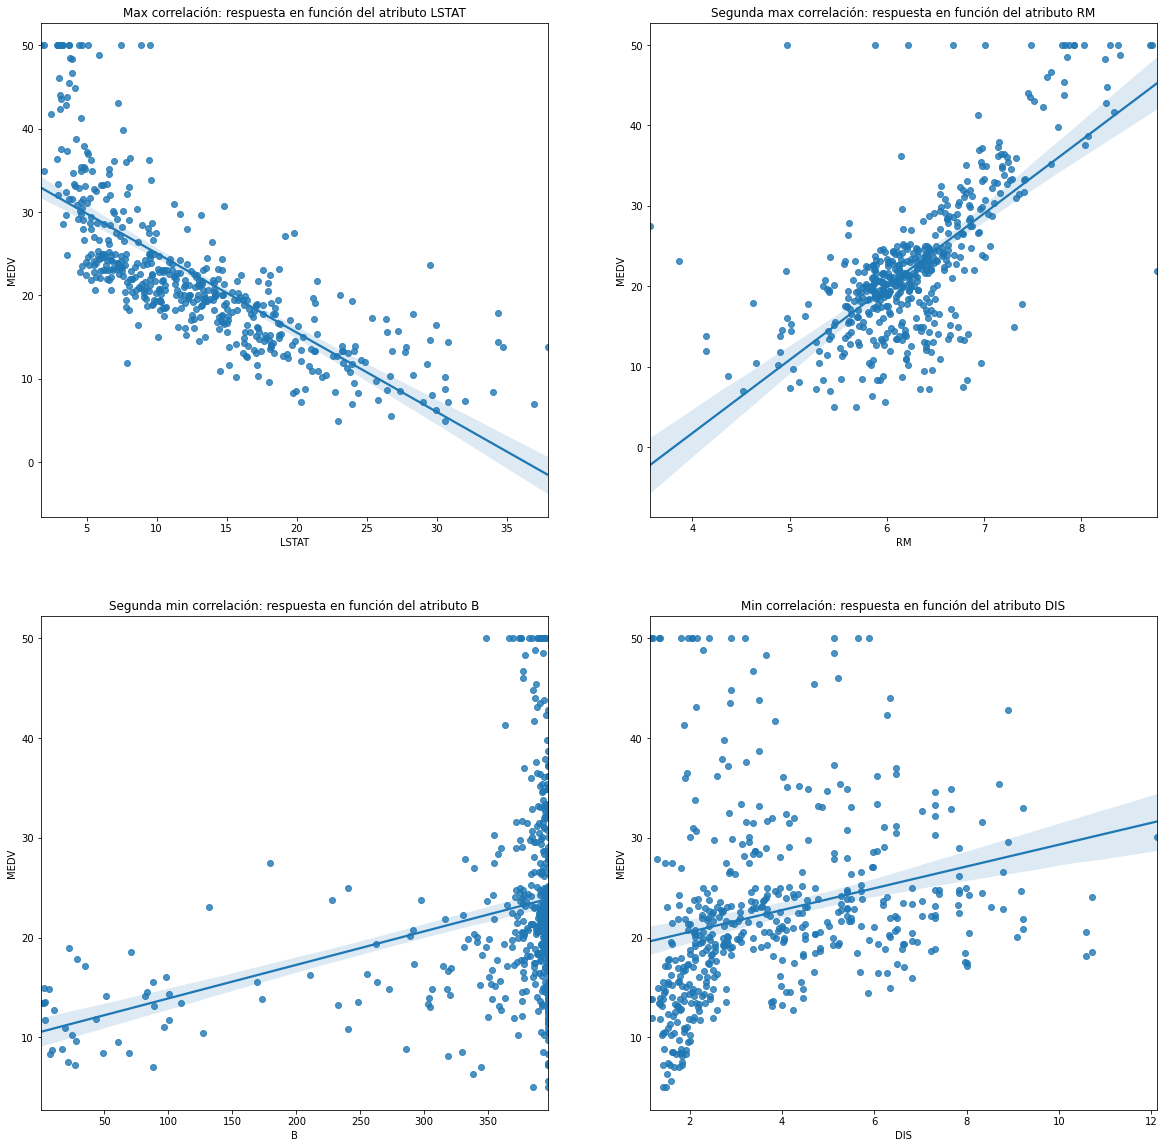

In [12]:
# Buscamos las correlaciones más fuertes
corr_max = sorted(corr, key = lambda corr_key: abs(corr[corr_key]))[-1]
corr_max2 = sorted(corr, key = lambda corr_key: abs(corr[corr_key]))[-2]

# Las correlaciones menos fuertes
corr_min = sorted(corr, key = lambda corr_key: abs(corr[corr_key]))[0]
corr_min2 = sorted(corr, key = lambda corr_key: abs(corr[corr_key]))[1]

# Dibujamos
fig, axis = plt.subplots(2, 2, figsize=(20, 20))

# Para el máximo
sns.regplot(x = df_boston[corr_max], y = df_boston["MEDV"], ax = axis[0,0])
axis[0,0].set_title("Max correlación: respuesta en función del atributo " + corr_max)

# Segundo máximo
sns.regplot(x = df_boston[corr_max2], y = df_boston["MEDV"], ax = axis[0,1])
axis[0,1].set_title("Segunda max correlación: respuesta en función del atributo " + corr_max2)

# Para el segundo mínimo
sns.regplot(x = df_boston[corr_min2], y = df_boston["MEDV"], ax = axis[1,0])
axis[1,0].set_title("Segunda min correlación: respuesta en función del atributo " + corr_min2)

# Para el mínimo
sns.regplot(x = df_boston[corr_min], y = df_boston["MEDV"], ax = axis[1,1])
axis[1,1].set_title("Min correlación: respuesta en función del atributo " + corr_min)

# Mostramos
plt.savefig("Correlaciones_regresion.jpg")
plt.show()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Se puede ver las correlaciones en las dos primeros gráficos, donde los puntos se diferencian por poco con la regresión lineal. Sin embargo, en los dos últimos gráficos la línea dibujada no se corresponde con los puntos dibujados, debido a la baja correlación entre los atributos y el target.
</div>

# 3. Reducción de la dimensionalidad

En este ejercicio se aplicarán métodos de reducción de la dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones, pero que contengan la máxima información posible presente en los atributos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplicaremos el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Generaremos un gráfico con el resultado del PCA en el que se muestre, en función de los valores de las dos componentes en los ejes x e y, el valor de la respuesta MEDV usando la escala de colores. El objetivo es visualizar la variación de MEDV en función de los valores de las componentes principales generadas.</li>
</ul>
    
NOTA: Vigilaremos de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos poder explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
No es necesario que programemos el algoritmo de PCA, usarremos la implementación disponible en la librería de "scikit-learn".<br>
</div>

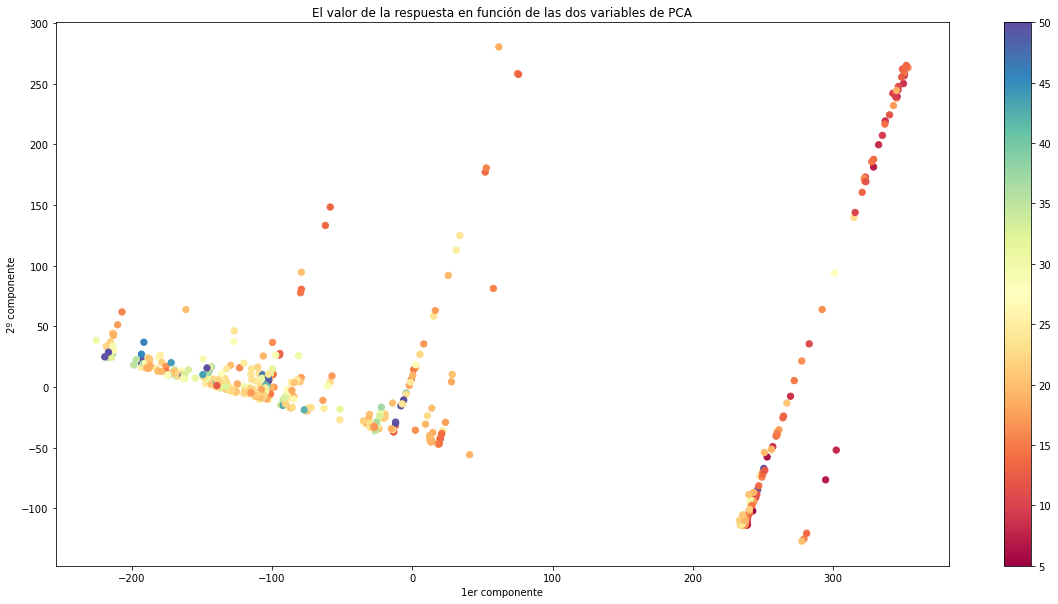

In [13]:
# Creamos nuevo df quitando el target 
df_sinM = df_boston.drop(columns = ["MEDV"])

# Aplicamos el PCA
boston_PCA = PCA(2).fit_transform(df_sinM)

# Generamos el gráfico
y = df_boston["MEDV"]
plt.figure(figsize = (20,10))
plt.scatter(
    boston_PCA[:, 0],
    boston_PCA[:, 1],
    c = y,
    cmap = plt.cm.get_cmap('Spectral'),
    s = 40,
)

#Título, etiquetas y colorbar
plt.title("El valor de la respuesta en función de las dos variables de PCA")
plt.xlabel("1er componente")
plt.ylabel("2º componente")
plt.colorbar()

#Guardamos y mostramos
plt.savefig("PCA.jpg")
plt.draw()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Repetiremos la reducción de dimensionalidad, pero en este caso usando TSNE. Más información sobre este algoritmo en el link: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Igual que antes, generaremos un gráfico con el resultado del TSNE en el que se muestre, en función de los valores de las 2 nuevas dimensiones en los ejes x e y, el valor de la respuesta MEDV usando una escala de colores.</li>
</ul>

<hr>
Usaremos la implementación disponible del algoritmo TSNE en la librería de "scikit-learn".<br>
A parte de especificar el número de componentes, probaremos a usar los parámetros "learning_rate" y "perplexity".<br>
</div>

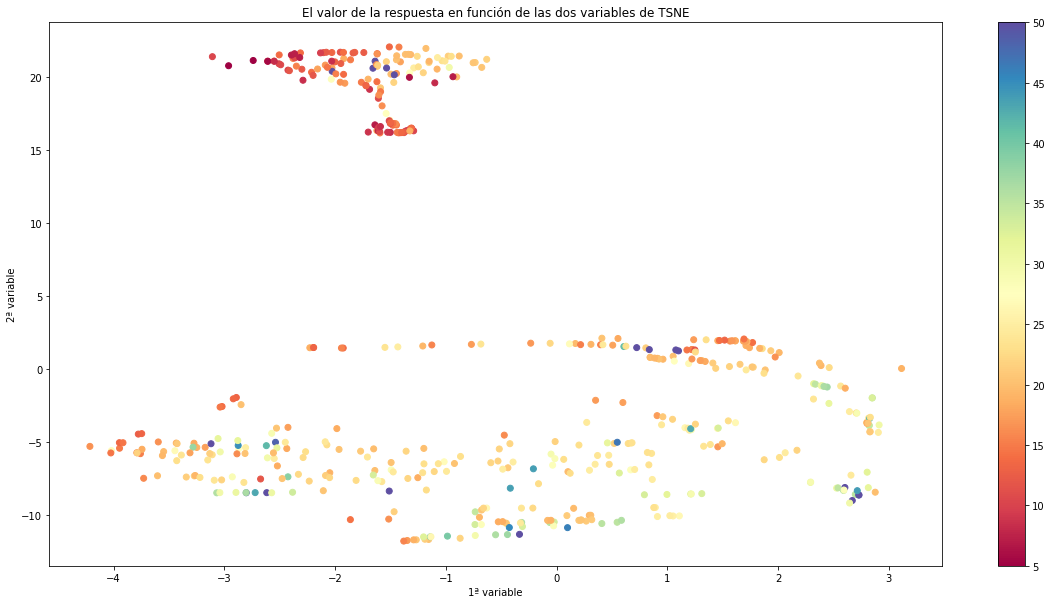

In [14]:
# Aplicamos T-SNE
boston_TSNE = TSNE(n_components = 2, learning_rate = 50.0, perplexity = 100.0).fit_transform(df_sinM)

# Dibujamos las dos variables junto a la respuesta
plt.figure(figsize = (20,10))
plt.scatter(
    boston_TSNE[:, 0],
    boston_TSNE[:, 1],
    c = y,
    cmap = ("Spectral"),
)
plt.title("El valor de la respuesta en función de las dos variables de TSNE")
plt.xlabel("1ª variable")
plt.ylabel("2ª variable")
plt.colorbar()
plt.draw()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿creéis que ha funcionado bien la reducción de dimensionalidad? ¿Os parece que las 2 nuevas dimensiones consiguen explicar la variación de MEDV y visualizar diferenciadamente precios caros y baratos? ¿Si utilizásemos las 2 nuevas variables para predecir MEDV, con cuál de los dos métodos de reducción de dimensionalidad creéis que obtendríamos los mejores resultados?
    
¿Por qué obtenemos resultados tan diferentes con los dos métodos?
</div>

# 4. Entrenamiento y test

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Random Forest para regresión, para predecir la mediana del precio de cada zona y evaluar la precisión obtenida con el modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con TSNE</li>
</ul>
<br>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Dividiremos el dataset en train y test utilizando la semilla definida al inicio del notebook (seed).</li>
    <li>Definiremos un modelo Random Forest (fijando n_estimators=10 para mantener el modelo simple y random_state=seed).</li>
    <li>Aplicaremos validación cruzada con el modelo definido y el dataset de train (con cv=5 ya es suficiente).</li>
    <li>Como métrica para cuantificar el error del modelo, utilizaremos tanto R2 (coeficiente de determinación) como MAE (la media del error absoluto) separadamente.</li>
    <li>Calcularemos la media y la desviación standard del error obtenido en cada caso.</li>
</ul>
    
<hr>

<strong>Notas:</strong><br>
<ul>
    <li>Para separar entre train y test usaremos 'train_test_split' de sklearn.<br>
    <li>Para entrenar un modelo random forest podéis usar 'RandomForestRegressor' de sklearn.<br>
    <li>Para aplicar validación cruzada podemos usar 'cross_val_score' de sklearn, y modificar su parámetro 'scoring' si fuese necesario.<br>
</ul>
</div>

In [15]:
#Separamos entre train y test
X_train, X_test, y_train, y_test = train_test_split(df_sinM, y, test_size=0.33, random_state = np.random.seed(100))

# Crear el modelo con 10 estimators
model = RandomForestRegressor(n_estimators=10, random_state = 100)

#La validación cruzada r2
vc_r2 = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5)
print("La validación cruzada de R2 ha sido de:", round(np.mean(vc_r2),3))

#La validación cruzada mae
vc_mae = cross_val_score(model, X_train, y_train, scoring = 'neg_median_absolute_error', cv = 5)
print("La validación cruzada de MAE ha sido de:", round(np.mean(vc_mae),3))

La validación cruzada de R2 ha sido de: 0.811
La validación cruzada de MAE ha sido de: -1.615


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repetiremos el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con PCA.
</div>

In [16]:
#Separamos entre train y test
X_train, X_test, y_train, y_test = train_test_split(boston_PCA, y, test_size=0.33, random_state = np.random.seed(100))

# Crear el modelo con 10 estimators
model = RandomForestRegressor(n_estimators=10, random_state = 100)

#La validación cruzada r2
vc_r2 = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5)
print("La validación cruzada de R2 ha sido de:", round(np.mean(vc_r2),3))

#La validación cruzada mae
vc_mae = cross_val_score(model, X_train, y_train, scoring = 'neg_median_absolute_error', cv = 5)
print("La validación cruzada de MAE ha sido de:", round(np.mean(vc_mae),3))

La validación cruzada de R2 ha sido de: 0.263
La validación cruzada de MAE ha sido de: -3.818


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repetiremos el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con TSNE.
</div>

In [17]:
#Separamos entre train y test
X_train, X_test, y_train, y_test = train_test_split(boston_TSNE, y, test_size=0.33, random_state = np.random.seed(100))

# Crear el modelo con 10 estimators
model = RandomForestRegressor(n_estimators=10, random_state = 100)

#La validación cruzada r2
vc_r2 = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5)
print("La validación cruzada de R2 ha sido de:", round(np.mean(vc_r2),3))

#La validación cruzada mae
vc_mae = cross_val_score(model, X_train, y_train, scoring = 'neg_median_absolute_error', cv = 5)
print("La validación cruzada de MAE ha sido de:", round(np.mean(vc_mae),3))

La validación cruzada de R2 ha sido de: 0.327
La validación cruzada de MAE ha sido de: -3.132


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong><br>
Se ve que con el dataset principal los resultados obtenidos son mejores. A su vez, el método T-SNE obtiene mejor R2 que el PCA. Tiene sentido, ya que en el análisis del 3er ejercicio no hemos encontrado un patrón significativo que explicase las casas pobres y ricas.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayáis obtenido:
    
<ul>
  <li>Generamos predicciones sobre el dataset de test.</li>
  <li>Calculamos la precisión de las predicciones obtenidas (R2 y MAE).</li>
</ul>
 
<hr>
Sugerencia: para calcular R2 y MAE podéis usar las funciones dentro del módulo "metrics" de sklearn.
</div>

In [23]:
#Separamos entre train y test
X_train, X_test, y_train, y_test = train_test_split(df_sinM, y, test_size=0.33, random_state=np.random.seed(seed))

# Crear el modelo con 10 estimators
model = RandomForestRegressor(n_estimators=10, random_state = seed)

# Se entrena el modelo
y_predict = model.fit(X_train, y_train).predict(X_test)

#El error R2
r2_score = r2_score(y_test, y_predict)
print("El error R2 es de: {}".format(r2_score))

#El error MAE
mae_score = mean_absolute_error(y_test, y_predict)
print("El error MAE es de: ", mae_score)

El error R2 es de: 0.7809590584803725
El error MAE es de:  2.779520958083832


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong><br>
Se recomienda utilizar R-Squared o R-Squared ajustado para evaluar el rendimiento del modelo de los modelos de regresión . Esto se debe principalmente a que R-Squared captura la fracción de varianza de los valores reales capturados por el modelo de regresión y tiende a brindar una mejor imagen de la calidad del modelo de regresión. Además, los valores de MSE difieren en función de si los valores de la variable de respuesta están escalados o no. Una mejor medida en lugar de MSE es el error cuadrático medio (RMSE) que se ocupa del hecho relacionado con si los valores de la variable de respuesta están escalados o no.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>BONUS:</strong><br>
El modelo random forest depende de muchos parámetros. En este ejercicio sólo hemos especificado el número de árboles (n_estimators) y hemos dejado que usara el resto de parámetros por defecto. Dos parámetros muy útiles en los random forest (y en cualquier modelo que use árboles) son el max_depth y el min_samples_split. Estos parámetros ayudan a controlar el overfitting.
    
Entrenamos los modelos anteriores usando diferentes combinaciones de los parámetros:<ul>
  <li>n_estimators</li>
  <li>max_depth</li>
  <li>min_samples_split</li>
</ul>
con el objetivo de encontrar la combinación de parámetros que da los mejores resultados en el conjunto de datos de entrenamiento.    
    
<hr>
Utilizaremos GridSearchCV dentro del módulo "model_selection" de sklearn.
</div>

In [19]:
#Definicmos los hiperparámetros que probaremos
n_estimators = [10,20,50]
max_depth = range(5,11)
min_samples_split = [2,10,20,50]
parameters = {
    "n_estimators" : n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split
}

#Buscamos los mejores hiperparámetros
model_rforest = RandomForestRegressor()
clf_rforest = GridSearchCV(model_rforest, parameters, scoring = 'r2')
grid_search = clf_rforest.fit(X_train,y_train)

print(f"Los hiperparámetros con mayor precisión han sido los siguientes: {str(grid_search.best_params_)}")

Los hiperparámetros con mayor precisión han sido los siguientes: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [21]:
# Entrenamos modelo con nuevo
model_rforest = RandomForestRegressor(max_depth = 9, min_samples_split = 2, n_estimators = 50)

# Se entrena el modelo y predecimos a partir de X_test
regr = model_rforest.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# R2
r2 = r2_score(y_test, y_pred)
print("El valor R2 ha sido de {}".format(r2))

#El error MAE
mae_score = mean_absolute_error(y_test, y_pred)
print("El error MAE es de: {}".format(mae_score))

El valor R2 ha sido de 0.8057548875555889
El error MAE es de: 2.6493246913139834


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
El modelo ha mejorado con los nuevos parámetros utilizados. Como final, veremos como se predicen los valores en una scatterplot.
</div>

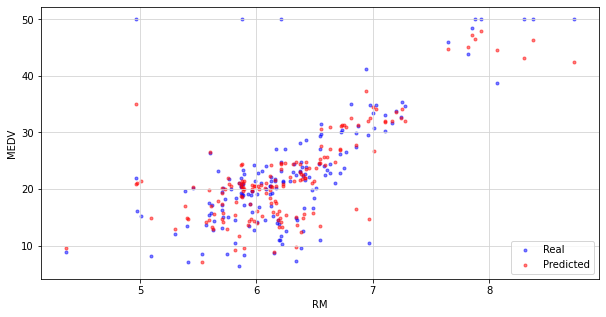

In [22]:
# Definimos el eje X
x_axis = X_test.RM

# Dibujamos Scatterplot
plt.figure(figsize=(10,5))
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()